In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

## Step 1: load the data

In [2]:
df1 = pd.read_csv(
    './Data/dataset1.txt', 
    delimiter='     ', 
    header=None
)
for col in df1.columns:
    df1.rename(
    {
        col: 'feature_{}'.format(col+1)
    },
    axis='columns',
    inplace=True
)
df1.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        461        501        472        486        517        509   
1        487        511        501        499        490        495   
2        505        506        494        529        495        536   
3        490        507        497        504        487        507   
4        504        491        478        517        472        467   

   feature_7  feature_8  
0        480        515  
1        485        512  
2        528        522  
3        539        461  
4        508        514

In [3]:
df2 = pd.read_csv(
    './Data/dataset2.txt', 
    delimiter='     ', 
    header=None
)
for col in df2.columns:
    df2.rename(
    {
        col: 'feature_{}'.format(col+1)
    },
    axis='columns',
    inplace=True
)
df2.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        480        471        552        414        514        452   
1        521        512        511        471        413        522   
2        518        456        449        478        425        576   
3        476        507        417        514        522        511   
4        417        540        567        560        447        459   

   feature_7  feature_8  feature_9  feature_10  ...  feature_55  feature_56  \
0        388        392        527         589  ...         502         485   
1        537        476        416         488  ...         564         533   
2        500        518        445         497  ...         493         558   
3        465        521        558         516  ...         380         643   
4        557        420        538         586  ...         514         504   

   feature_57  feature_58  feature_59  feature_60  feature_61  feature_62  \
0         453         508         420         559         545         502   
1         504         564         515         495         558         445   
2         530         507         512         455         440         510   
3         453         464         466         517         537         447   
4         509         439         464         490         487         471   

   feature_63  feature_64  
0         605         484  
1         455         517  
2         553         524  
3         455         534  
4         552         520  

[5 rows x 64 columns]

In [4]:
df3 = pd.read_csv(
    './Data/dataset3.txt', 
    delimiter='     ', 
    header=None
)
for col in df3.columns:
    df3.rename(
    {
        col: 'feature_{}'.format(col+1)
    },
    axis='columns',
    inplace=True
)
df3.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      29020     860619     658827     854383     199909      71042   
1      32683     862625     671429     818015     192524      52264   
2      34519     859181     678552     824984     194710      50986   
3      35250     847859     652480     828636     196389      63096   
4      35920     860543     651526     796781     222808      64757   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0     181528     450820      43739      345940      789286      362103   
1     146394     447133      36171      378042      784684      356856   
2     164282     448693      14559      369041      776997      367400   
3     166515     429911      54324      368559      765723      361038   
4     171196     446089      40085      366475      782777      386218   

   feature_13  feature_14  feature_15  
0      620337      310595      461270  
1      594499      319498      478757  
2      615245      281741      445673  
3      623793      299209      443797  
4      605180      312034      478862

In [5]:
df4 = pd.read_csv(
    './Data/dataset4.txt', 
    delimiter='   ', 
    header=None
)
for col in df4.columns:
    df4.rename(
    {
        col: 'feature_{}'.format(col+1)
    },
    axis='columns',
    inplace=True
)
df4.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        126        151        205         39        163         36   
1        126        151        205         39        162         36   
2        126        151        205         39        163         36   
3        126        151        204         39        162         37   
4        127        151        206         39        162         36   

   feature_7  feature_8  feature_9  feature_10  ...  feature_1015  \
0        136        187        113         196  ...            86   
1        136        187        113         195  ...            86   
2        137        188        113         195  ...            86   
3        136        187        113         194  ...            87   
4        135        188        112         195  ...            86   

   feature_1016  feature_1017  feature_1018  feature_1019  feature_1020  \
0           112           165           173           204            91   
1           112           165           174           204            91   
2           111           165           173           204            91   
3           112           165           172           203            91   
4           112           165           173           204            91   

   feature_1021  feature_1022  feature_1023  feature_1024  
0            59           149           139           128  
1            59           148           139           127  
2            59           148           139           127  
3            59           148           140           127  
4            59           148           139           128  

[5 rows x 1024 columns]

## Step 2: explore clustering options for all dataframes

### Explore dataset 1

In [6]:
def display_n_samples_df(df):
    print('Number of samples in dataset 1: {}'.format(df.shape[0]))

In [7]:
display_n_samples_df(df1)

Number of samples in dataset 1: 2048


#### Visualize all samples

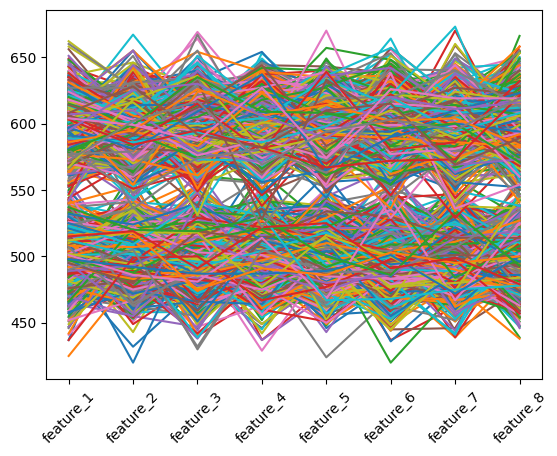

In [8]:
def visualize_samples_df(df):
    df = df[[column for column in df.columns if column.__contains__('feature')]]
    df.T.plot(legend=False)

    # get rid of the ticks between the labels - not necessary
    plt.xticks(ticks=range(0, len(df.T)), rotation=45)

    plt.show()
    
visualize_samples_df(df1)

In [9]:
# As a hard threshold, I will say that the maximum number of clusters is equal to 5% of the number of samples in my input data

In [10]:
def define_max_n_clusters_df(df):
    max_n_clusters = int(np.round(df.shape[0]*0.05,0))
    return max_n_clusters

max_n_clusters = define_max_n_clusters_df(df1)
print('Maximum number of clusters to experiment with: {}'.format(max_n_clusters))

Maximum number of clusters to experiment with: 102


#### Scale the data

In [11]:
def scale_df(df):
    scaler = StandardScaler()
    scaler.fit(df)
    
    df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
    
    return df_scaled

df1_scaled = scale_df(df1)

#### Apply K-Means with K=2

In [12]:
X = np.array(df1_scaled)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)

#### Apply PCA to visualize the data in 2D

In [13]:
pca = PCA(2)
df1_2dim = pca.fit_transform(df1_scaled)

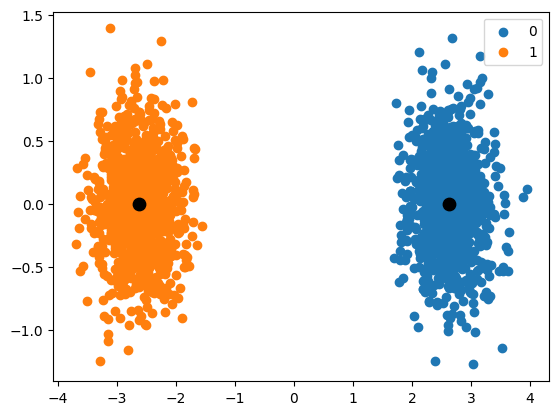

In [14]:
unique_labels = np.unique(y)
centroids = kmeans.cluster_centers_
centroids_2dim = pca.transform(centroids)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df1_2dim[y == i , 0] , df1_2dim[y == i , 1] , label = i)
plt.scatter(centroids_2dim[:,0] , centroids_2dim[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

#### Explore methods to determine the optimal value of K

In [15]:
k_values = range(2, max_n_clusters)

Text(0.5, 1.0, 'Elbow curve')

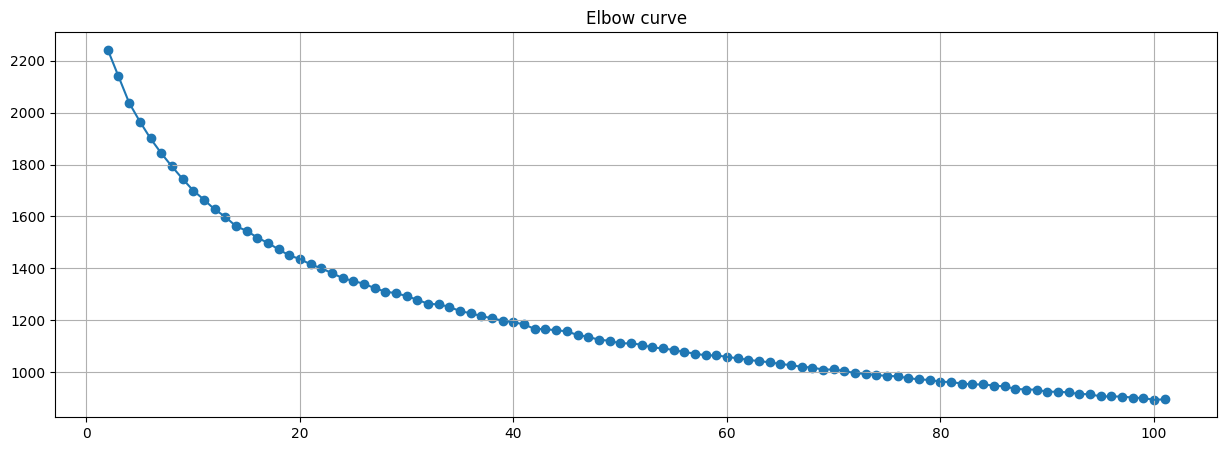

In [16]:
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(k_values, distortions)
plt.plot(k_values, distortions)
plt.grid(True)
plt.title('Elbow curve')

##### First Derivative Method

In [17]:
distortion_decrease_rate = np.diff(distortions) / distortions[1:] * 100.0
optimal_k = np.argmax(np.abs(distortion_decrease_rate)) + 1
print('Optimal K: {}'.format(optimal_k))

Optimal K: 2


In [18]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

In [19]:
group_sizes = []
for label in unique_labels:
    group_size = sum(y==label)
    print('Label {}: {} samples'.format(label, group_size))
    group_sizes.append(group_size)

Label 0: 1024 samples
Label 1: 1024 samples


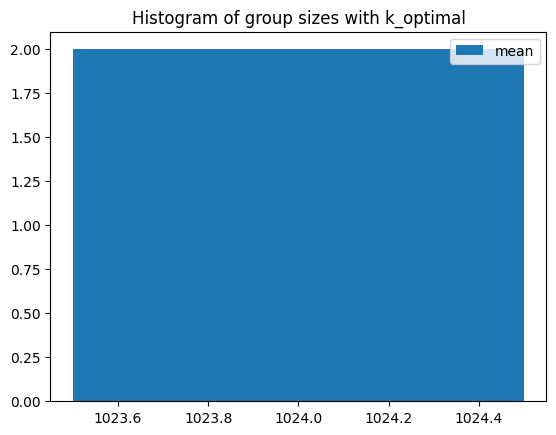

In [20]:
plt.hist(group_sizes, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of group sizes with k_optimal")
plt.legend({'mean': 'k', 'median': 'r'})
plt.show()

In [21]:
df1['Label_KMeans_FirstDerivative'] = y

In [22]:
df1.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        461        501        472        486        517        509   
1        487        511        501        499        490        495   
2        505        506        494        529        495        536   
3        490        507        497        504        487        507   
4        504        491        478        517        472        467   

   feature_7  feature_8  Label_KMeans_FirstDerivative  
0        480        515                             1  
1        485        512                             1  
2        528        522                             1  
3        539        461                             1  
4        508        514                             1

##### Plot cluster centroids

<AxesSubplot: >

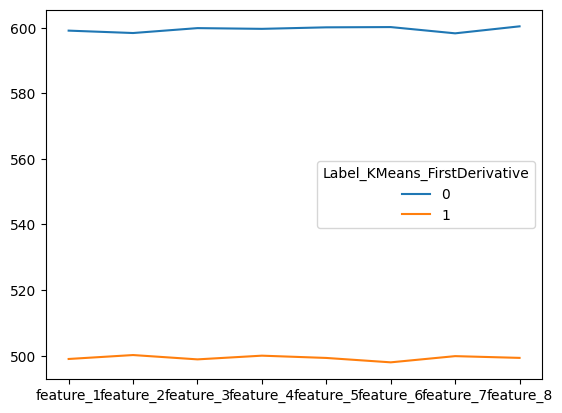

In [23]:
df1.groupby(['Label_KMeans_FirstDerivative']).agg(
    {
        'feature_1': 'mean',
        'feature_2': 'mean',
        'feature_3': 'mean',
        'feature_4': 'mean',
        'feature_5': 'mean',
        'feature_6': 'mean',
        'feature_7': 'mean',
        'feature_8': 'mean'
    }
).T.plot()

##### Kneedle Algorithm

In [24]:
len(k_values)

100

In [25]:
len(distortions)

100

In [26]:
# Assuming 'distortions' is your WCSS or inertia values, and 'k_values' is the number of clusters
kn = KneeLocator(list(k_values), distortions, curve='convex', direction='decreasing')
optimal_k = kn.knee
print('Optimal K: {}'.format(optimal_k))

Optimal K: 32


In [27]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

In [28]:
group_sizes = []
for label in unique_labels:
    group_size = sum(y==label)
    print('Label {}: {} samples'.format(label, group_size))
    group_sizes.append(group_size)
    
group_sizes = np.array(group_sizes)

Label 0: 63 samples
Label 1: 70 samples
Label 2: 66 samples
Label 3: 70 samples
Label 4: 61 samples
Label 5: 62 samples
Label 6: 77 samples
Label 7: 53 samples
Label 8: 54 samples
Label 9: 63 samples
Label 10: 84 samples
Label 11: 49 samples
Label 12: 92 samples
Label 13: 56 samples
Label 14: 72 samples
Label 15: 69 samples
Label 16: 66 samples
Label 17: 79 samples
Label 18: 50 samples
Label 19: 86 samples
Label 20: 40 samples
Label 21: 49 samples
Label 22: 75 samples
Label 23: 64 samples
Label 24: 56 samples
Label 25: 46 samples
Label 26: 62 samples
Label 27: 75 samples
Label 28: 68 samples
Label 29: 54 samples
Label 30: 62 samples
Label 31: 55 samples


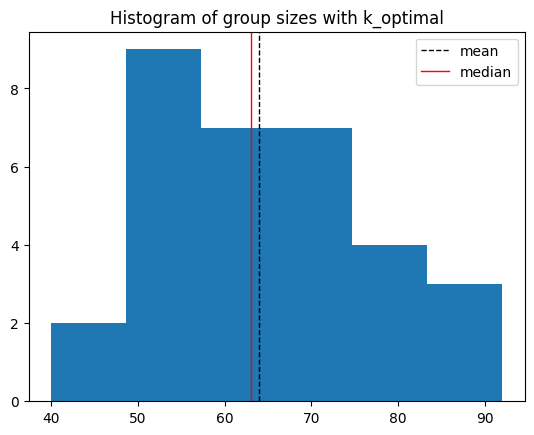

In [29]:
plt.hist(group_sizes, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of group sizes with k_optimal")
plt.axvline(group_sizes.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(group_sizes), color='r', linewidth=1)
plt.legend({'mean': 'k', 'median': 'r'})
plt.show()

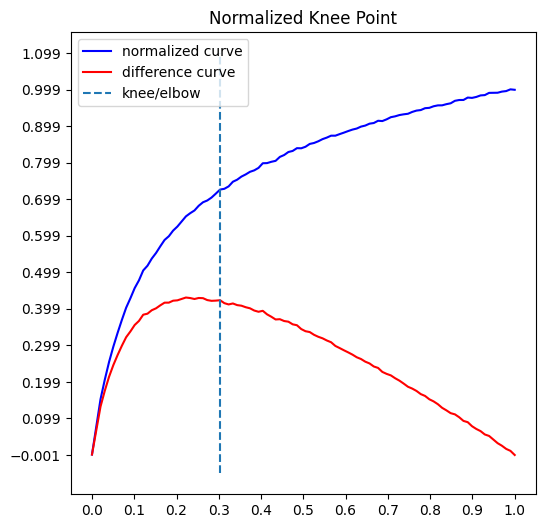

In [30]:
kn.plot_knee_normalized()

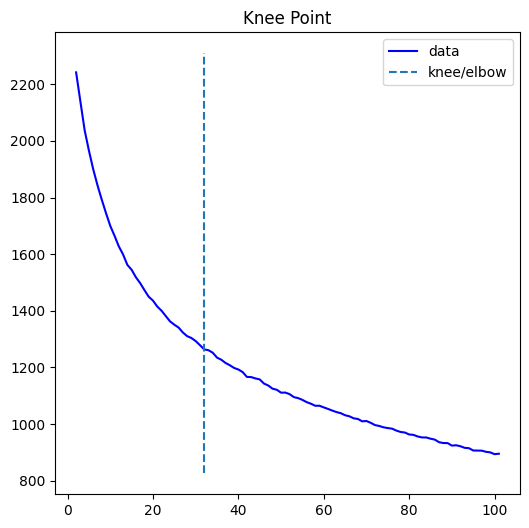

In [31]:
kn.plot_knee()

In [32]:
df1['Label_KMeans_Knee'] = y

In [33]:
df1.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        461        501        472        486        517        509   
1        487        511        501        499        490        495   
2        505        506        494        529        495        536   
3        490        507        497        504        487        507   
4        504        491        478        517        472        467   

   feature_7  feature_8  Label_KMeans_FirstDerivative  Label_KMeans_Knee  
0        480        515                             1                  3  
1        485        512                             1                 16  
2        528        522                             1                  9  
3        539        461                             1                 19  
4        508        514                             1                  5

### Plot cluster centroids

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'feature_8'),
  Text(0.0, 0, 'feature_1'),
  Text(1.0, 0, 'feature_2'),
  Text(2.0, 0, 'feature_3'),
  Text(3.0, 0, 'feature_4'),
  Text(4.0, 0, 'feature_5'),
  Text(5.0, 0, 'feature_6'),
  Text(6.0, 0, 'feature_7'),
  Text(7.0, 0, 'feature_8'),
  Text(8.0, 0, '')])

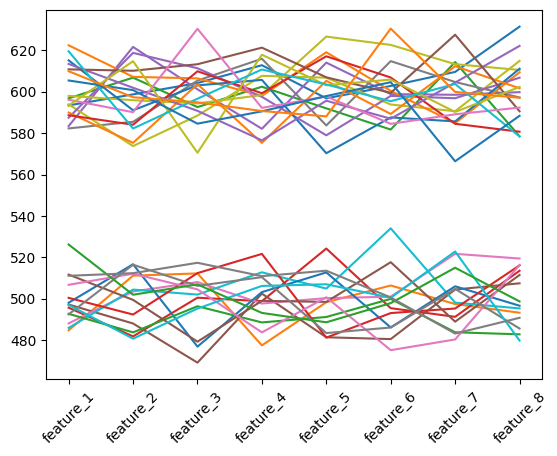

In [34]:
df1.groupby(['Label_KMeans_Knee']).agg(
    {
        'feature_1': 'mean',
        'feature_2': 'mean',
        'feature_3': 'mean',
        'feature_4': 'mean',
        'feature_5': 'mean',
        'feature_6': 'mean',
        'feature_7': 'mean',
        'feature_8': 'mean'
    }
).T.plot(legend=False)

plt.xticks(rotation=45)

##### Silhouette Score

In [35]:
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2  # +2 since we start from 2 clusters
print('Optimal K: {}'.format(optimal_k))

Optimal K: 2


In [36]:
model = KMeans(n_clusters=optimal_k)
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
silhouette_scores.append(score)

print('Average Silhouette: {:.2f}'.format(score))

Average Silhouette: 0.74


In [37]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

In [38]:
group_sizes = []
for label in unique_labels:
    group_size = sum(y==label)
    print('Label {}: {} samples'.format(label, group_size))
    group_sizes.append(group_size)
    
group_sizes = np.array(group_sizes)

Label 0: 1024 samples
Label 1: 1024 samples


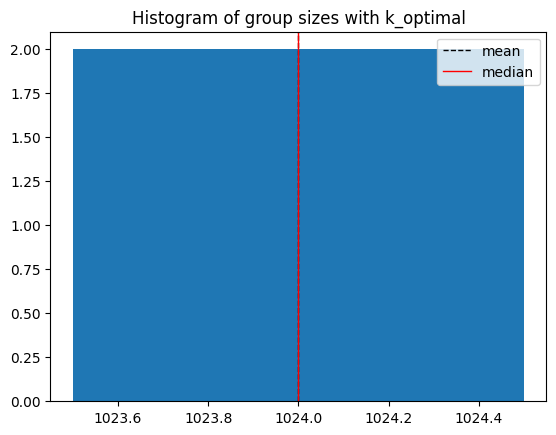

In [39]:
plt.hist(group_sizes, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of group sizes with k_optimal")
plt.axvline(group_sizes.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(group_sizes), color='r', linewidth=1)
plt.legend({'mean': 'k', 'median': 'r'})
plt.show()

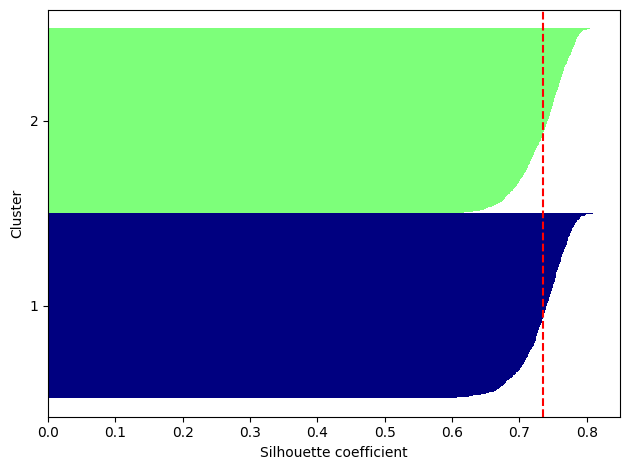

In [40]:
n_clusters = unique_labels.shape[0]
silhouette_vals = silhouette_samples(X, y, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(unique_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, unique_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

##### Visualize the clusters using T-SNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2)
X_2d_tsne = tsne.fit_transform(X)

In [43]:
X_2d_tsne

array([[-22.229368 , -22.600576 ],
       [-34.576633 ,   3.618126 ],
       [-31.366875 ,  -6.59621  ],
       ...,
       [ 15.108872 , -12.295792 ],
       [ 48.41416  ,  14.03155  ],
       [ 20.012669 ,   6.0471654]], dtype=float32)

In [44]:
import seaborn as sns

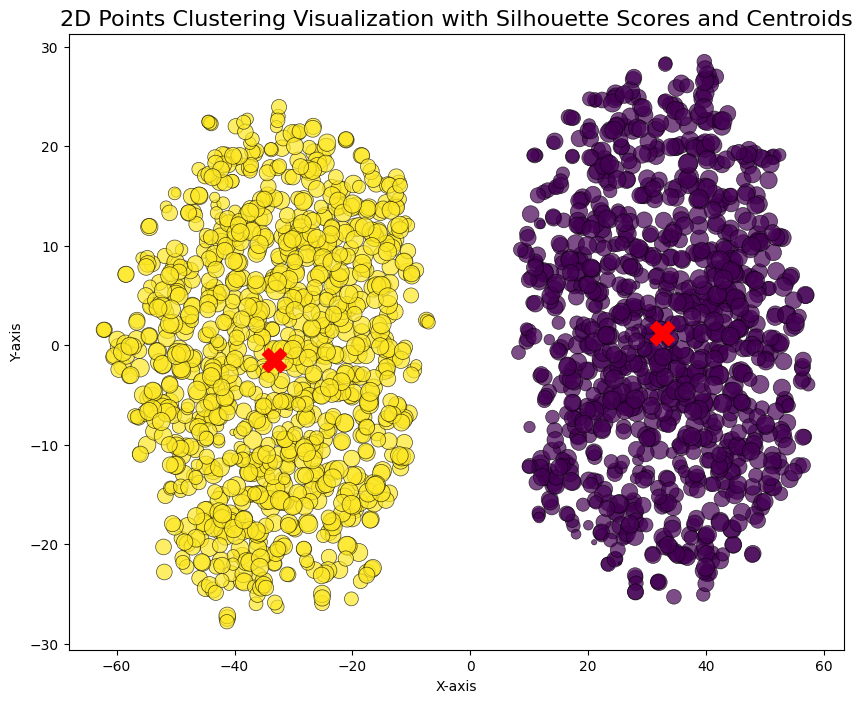

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assume you have X_2d_tsne (array of 2D points), y (list of labels), and silhouette_vals (list of silhouette scores)

# Normalize silhouette values to control the size range
min_size, max_size = 5, 200  # Set the min and max size for the scatter points
normalized_sizes = min_size + (max_size - min_size) * (np.array(silhouette_vals) - np.min(silhouette_vals)) / (np.max(silhouette_vals) - np.min(silhouette_vals))

# Create a scatter plot without the legend
plt.figure(figsize=(10, 8))

# Use a colormap to represent the labels
palette = sns.color_palette("hsv", len(np.unique(y)))

# Plot each point, where the color corresponds to the label and the size corresponds to the normalized silhouette score
scatter = plt.scatter(X_2d_tsne[:, 0], X_2d_tsne[:, 1], 
                      c=y,                        # Color by labels
                      s=normalized_sizes,         # Size by normalized silhouette score
                      cmap="viridis", alpha=0.7,  # Adjust alpha based on silhouette score
                      edgecolor='k', linewidth=0.5)

# Remove the legend
plt.gca().legend_ = None

# Calculate the centroids for each cluster
unique_labels = np.unique(y)
centroids = np.array([X_2d_tsne[y == label].mean(axis=0) for label in unique_labels])

# Plot the centroids with a large 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', color='red', s=300, label='Centroids')

# Add titles and labels
plt.title("2D Points Clustering Visualization with Silhouette Scores and Centroids", fontsize=16)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()

### Plot cluster centroids

In [46]:
df1['Label_KMeans'] = y

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'feature_8'),
  Text(0.0, 0, 'feature_1'),
  Text(1.0, 0, 'feature_2'),
  Text(2.0, 0, 'feature_3'),
  Text(3.0, 0, 'feature_4'),
  Text(4.0, 0, 'feature_5'),
  Text(5.0, 0, 'feature_6'),
  Text(6.0, 0, 'feature_7'),
  Text(7.0, 0, 'feature_8'),
  Text(8.0, 0, '')])

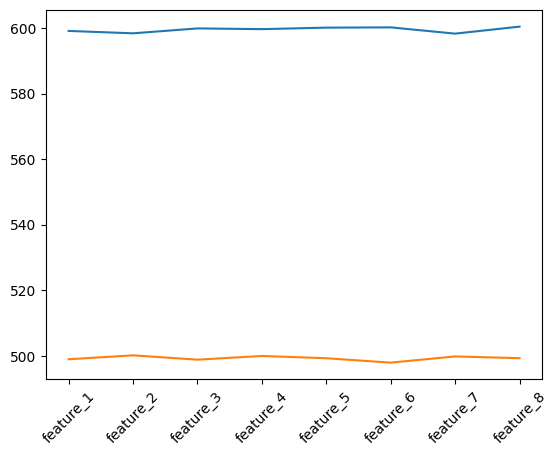

In [47]:
df1.groupby(['Label_KMeans']).agg(
    {
        'feature_1': 'mean',
        'feature_2': 'mean',
        'feature_3': 'mean',
        'feature_4': 'mean',
        'feature_5': 'mean',
        'feature_6': 'mean',
        'feature_7': 'mean',
        'feature_8': 'mean'
    }
).T.plot(legend=False)

plt.xticks(rotation=45)

In [48]:
df1['SilhouetteScore'] = silhouette_vals

In [49]:
df1.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        461        501        472        486        517        509   
1        487        511        501        499        490        495   
2        505        506        494        529        495        536   
3        490        507        497        504        487        507   
4        504        491        478        517        472        467   

   feature_7  feature_8  Label_KMeans_FirstDerivative  Label_KMeans_Knee  \
0        480        515                             1                  3   
1        485        512                             1                 16   
2        528        522                             1                  9   
3        539        461                             1                 19   
4        508        514                             1                  5   

   Label_KMeans  SilhouetteScore  
0             1         0.745137  
1             1         0.793712  
2             1         0.677125  
3             1         0.731541  
4             1         0.755371

In [50]:
df1.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'Label_KMeans_FirstDerivative',
       'Label_KMeans_Knee', 'Label_KMeans', 'SilhouetteScore'],
      dtype='object')

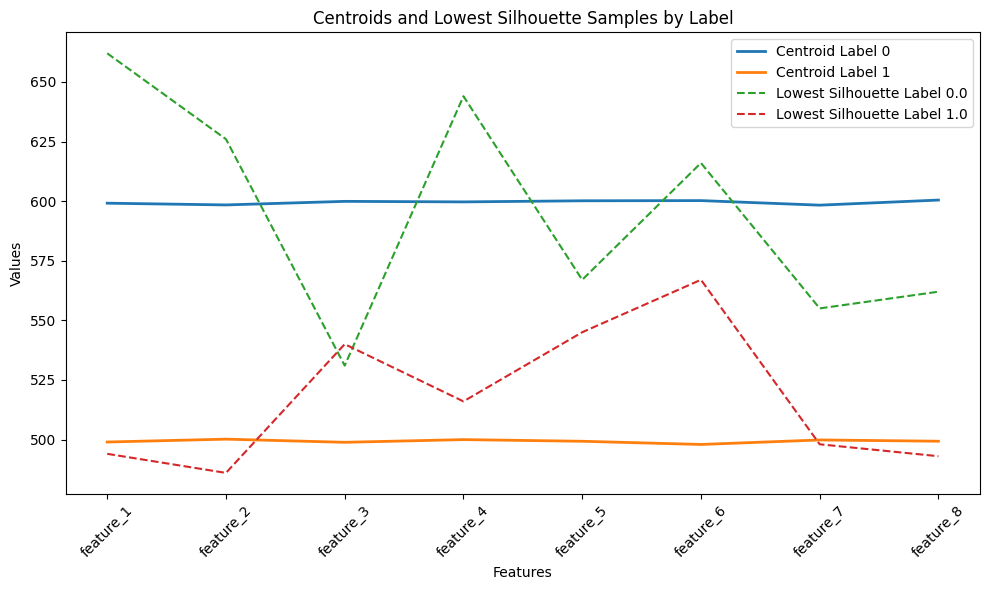

In [51]:
# List of feature columns
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Compute centroids (mean of each feature for each label)
centroids = df1.groupby('Label_KMeans')[features].mean()

# Find the sample with the lowest silhouette score in each label
lowest_silhouette_samples = df1.loc[df1.groupby('Label_KMeans')['SilhouetteScore'].idxmin()]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the centroid lines for each label
for label in centroids.index:
    plt.plot(features, centroids.loc[label], label=f'Centroid Label {label}', linewidth=2)

# Plot the lines for the samples with the lowest silhouette score
for i, row in lowest_silhouette_samples.iterrows():
    plt.plot(features, row[features], linestyle='--', label=f'Lowest Silhouette Label {row["Label_KMeans"]}', linewidth=1.5)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Centroids and Lowest Silhouette Samples by Label')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

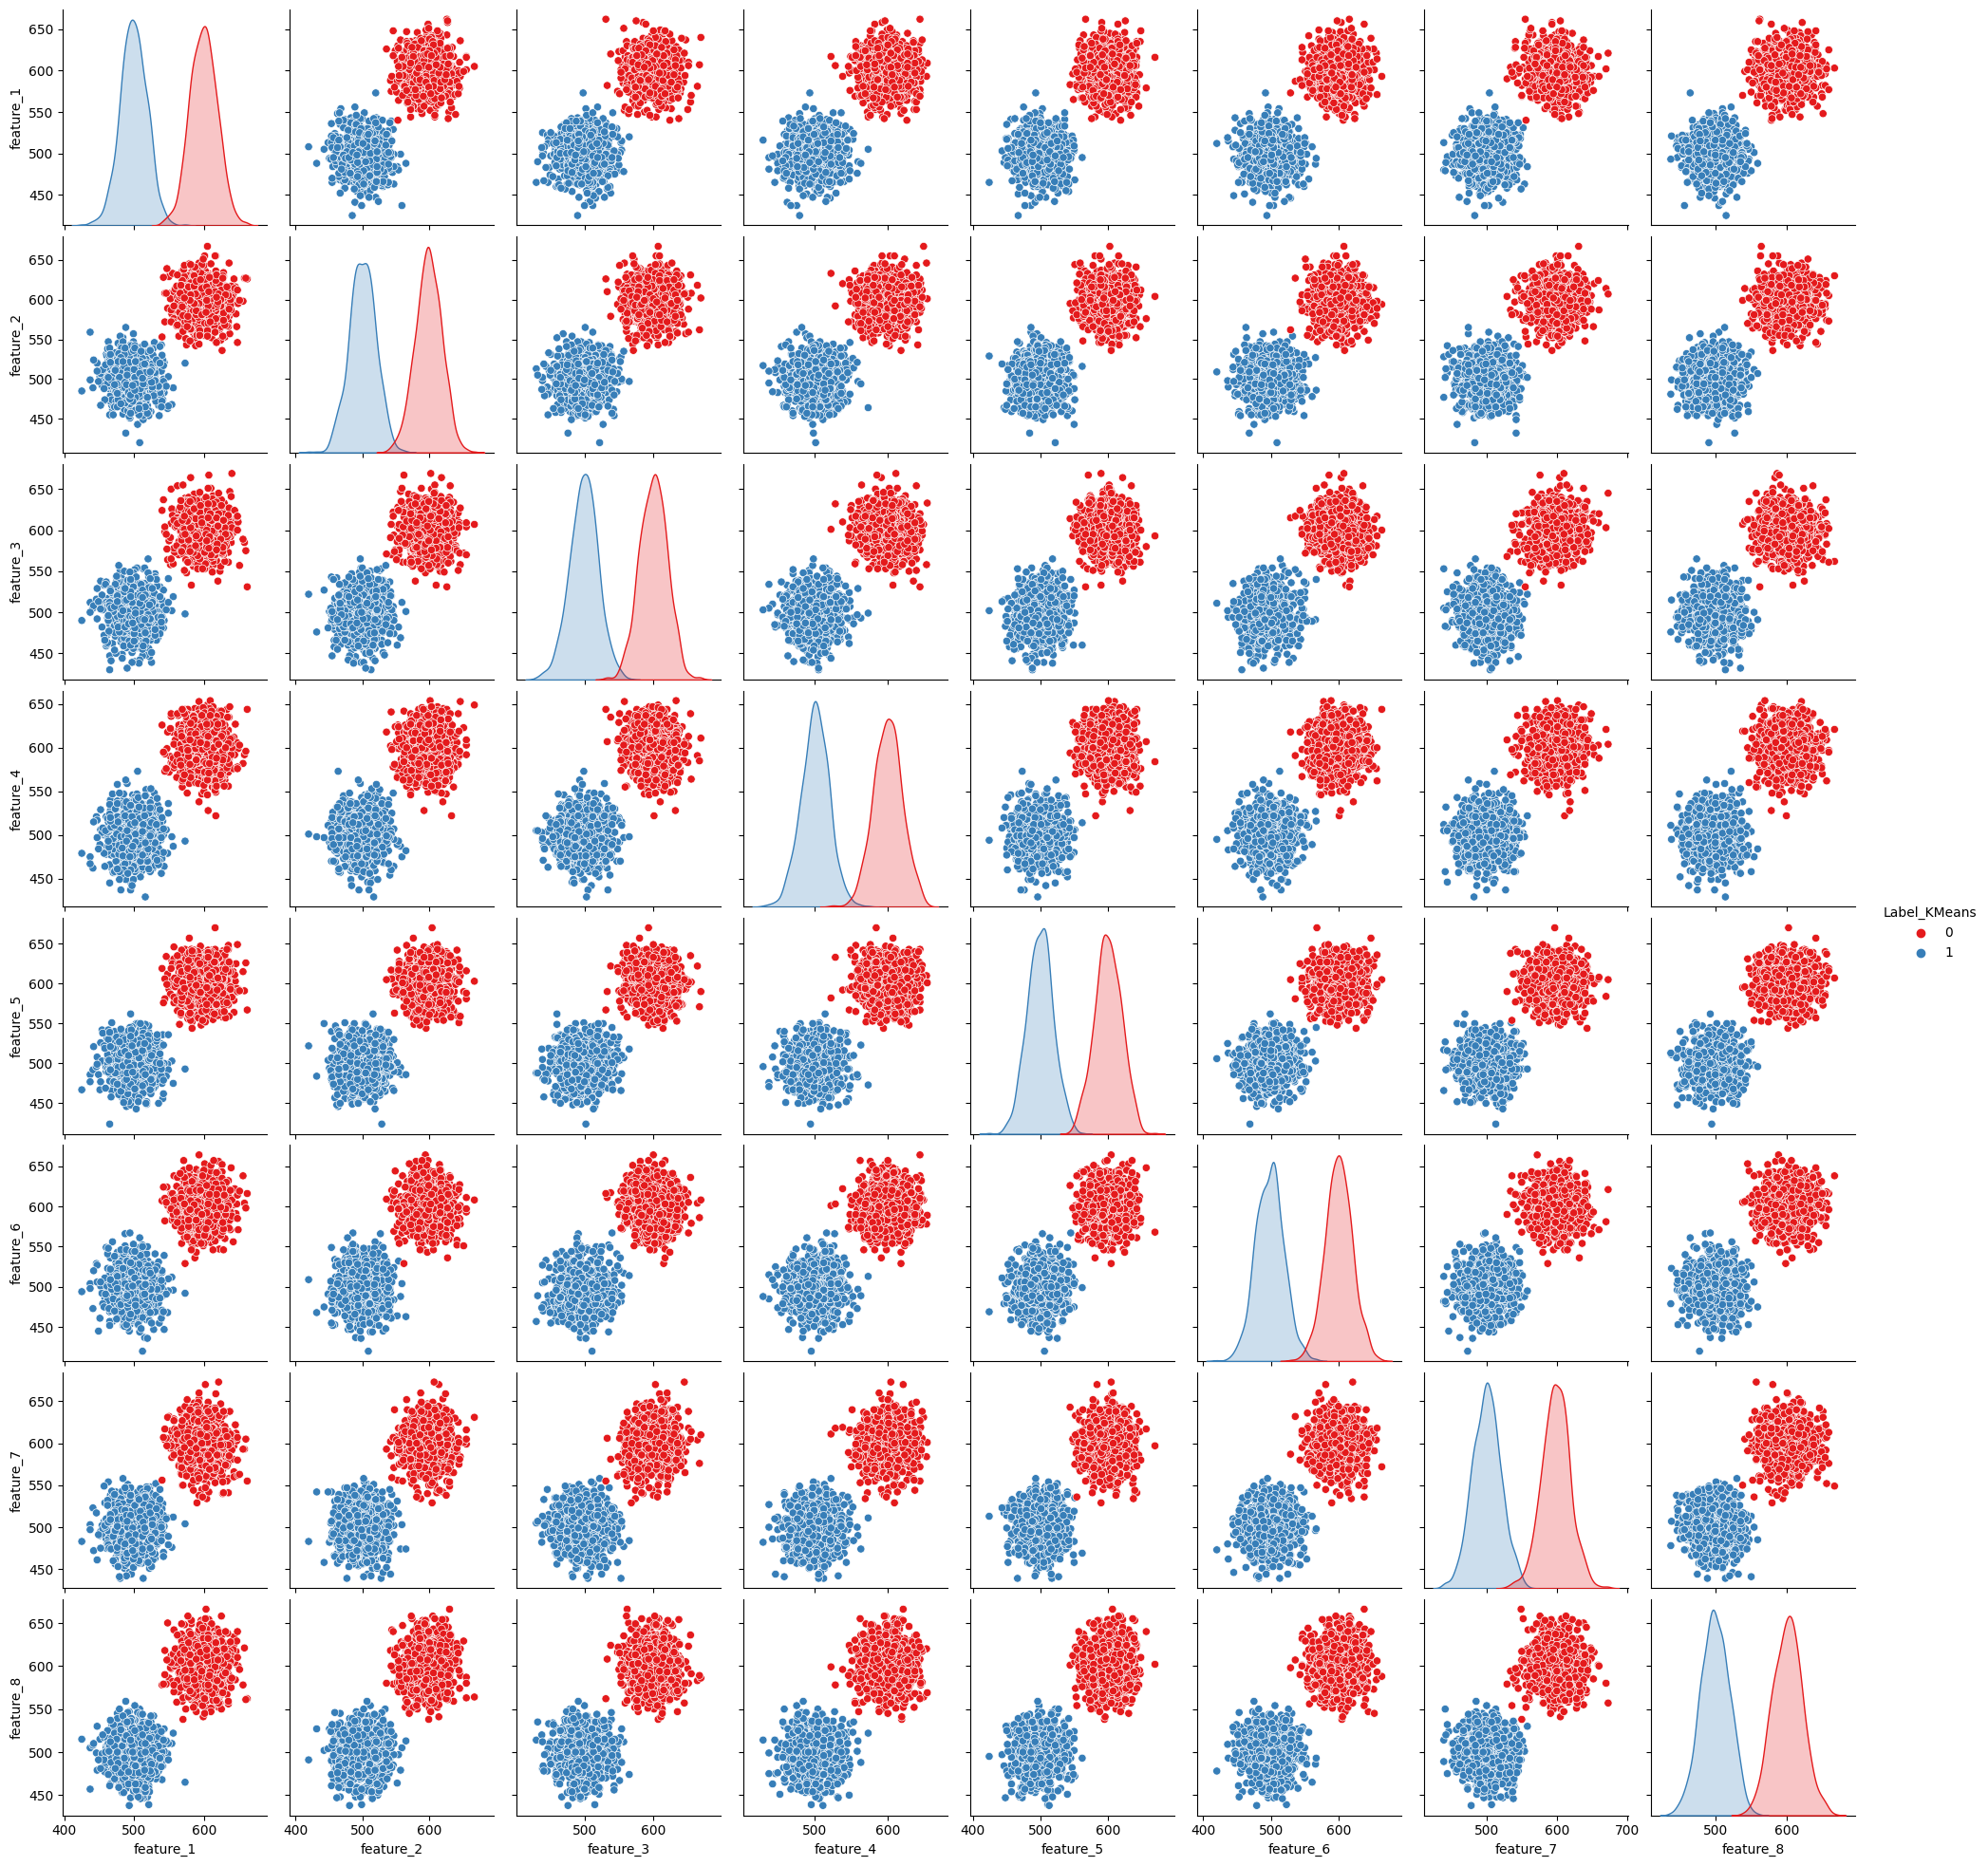

In [52]:
import seaborn as sns

# Create a pair plot of the features, color-coded by the cluster labels
sns.pairplot(df1, vars=features, hue='Label_KMeans', palette='Set1')

# Show the plot
plt.show()

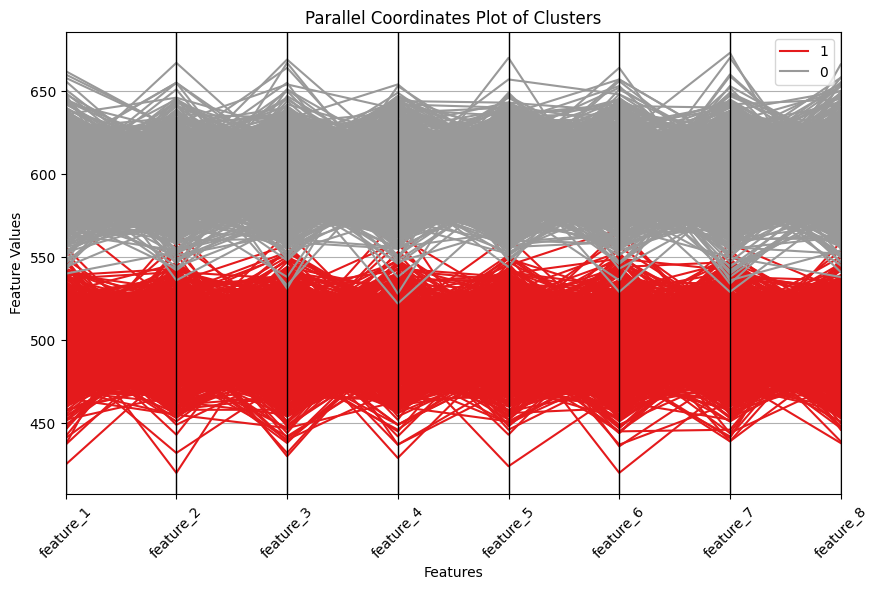

In [53]:
from pandas.plotting import parallel_coordinates

# Add the cluster label to the DataFrame
df_parallel = df1[features].copy()
df_parallel['Label'] = df1['Label_KMeans'].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, class_column='Label', colormap=plt.get_cmap("Set1"))

# Add labels and title
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()

### Explore dataset 2

In [54]:
display_n_samples_df(df2)

Number of samples in dataset 1: 2048


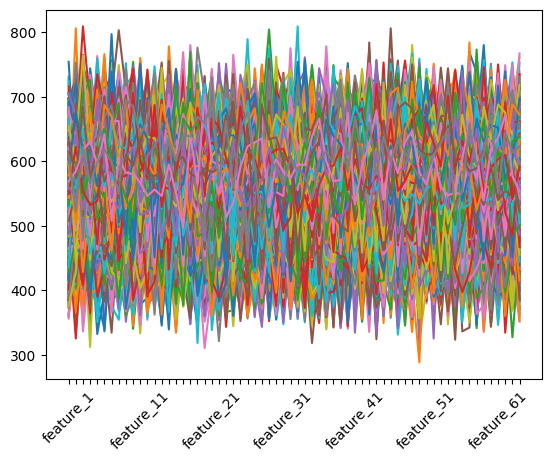

In [55]:
visualize_samples_df(df2)

In [56]:
max_n_clusters = define_max_n_clusters_df(df2)
print('Maximum number of clusters to experiment with: {}'.format(max_n_clusters))

Maximum number of clusters to experiment with: 102


In [57]:
df2_scaled = scale_df(df2)
X = np.array(df2_scaled)

In [58]:
## Apply kmeans and use the silhouette method to define the optimal number of clusters

k_values = range(2, max_n_clusters)

silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2  # +2 since we start from 2 clusters
print('Optimal K: {}'.format(optimal_k))

Optimal K: 2


In [59]:
model = KMeans(n_clusters=optimal_k)
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
silhouette_scores.append(score)

print('Average Silhouette: {:.2f}'.format(score))

Average Silhouette: 0.42


In [60]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

df2['Label_KMeans'] = y

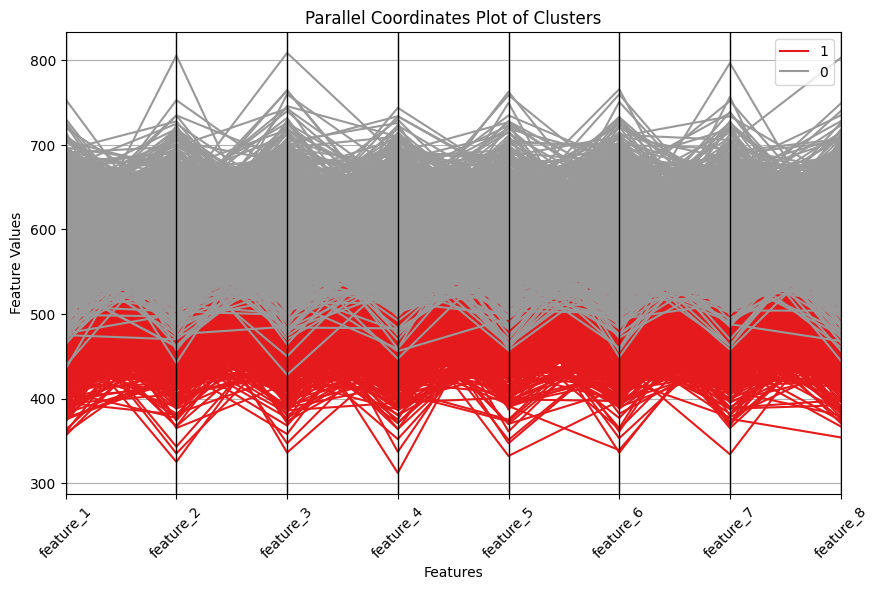

In [61]:
from pandas.plotting import parallel_coordinates

# Add the cluster label to the DataFrame
df_parallel = df2[features].copy()
df_parallel['Label'] = df2['Label_KMeans'].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, class_column='Label', colormap=plt.get_cmap("Set1"))

# Add labels and title
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()

### Explore dataset 3

In [62]:
display_n_samples_df(df3)

Number of samples in dataset 1: 10125


In [63]:
df3.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      29020     860619     658827     854383     199909      71042   
1      32683     862625     671429     818015     192524      52264   
2      34519     859181     678552     824984     194710      50986   
3      35250     847859     652480     828636     196389      63096   
4      35920     860543     651526     796781     222808      64757   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0     181528     450820      43739      345940      789286      362103   
1     146394     447133      36171      378042      784684      356856   
2     164282     448693      14559      369041      776997      367400   
3     166515     429911      54324      368559      765723      361038   
4     171196     446089      40085      366475      782777      386218   

   feature_13  feature_14  feature_15  
0      620337      310595      461270  
1      594499      319498      478757  
2      615245      281741      445673  
3      623793      299209      443797  
4      605180      312034      478862

In [64]:
for column in df3.columns:
    df3[column] = df3[column].astype('int')

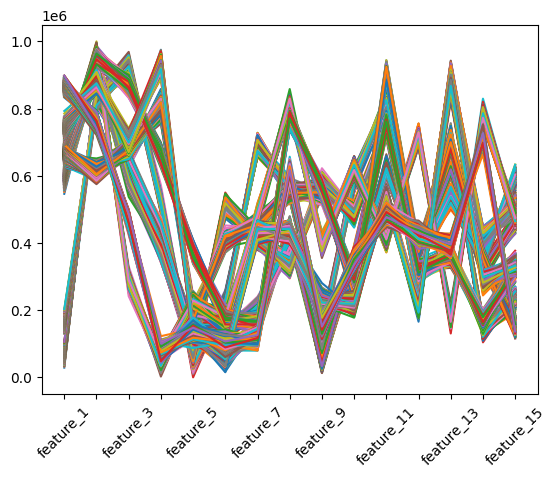

In [65]:
visualize_samples_df(df3)

In [66]:
max_n_clusters = define_max_n_clusters_df(df3)
print('Maximum number of clusters to experiment with: {}'.format(max_n_clusters))

Maximum number of clusters to experiment with: 506


In [67]:
df3_scaled = scale_df(df3)
X = np.array(df3_scaled)

In [68]:
## Apply kmeans and use the silhouette method to define the optimal number of clusters

k_values = range(2, max_n_clusters)

silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2  # +2 since we start from 2 clusters
print('Optimal K: {}'.format(optimal_k))

Optimal K: 9


In [69]:
model = KMeans(n_clusters=optimal_k)
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
silhouette_scores.append(score)

print('Average Silhouette: {:.2f}'.format(score))

Average Silhouette: 0.90


In [70]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

df3['Label_KMeans'] = y

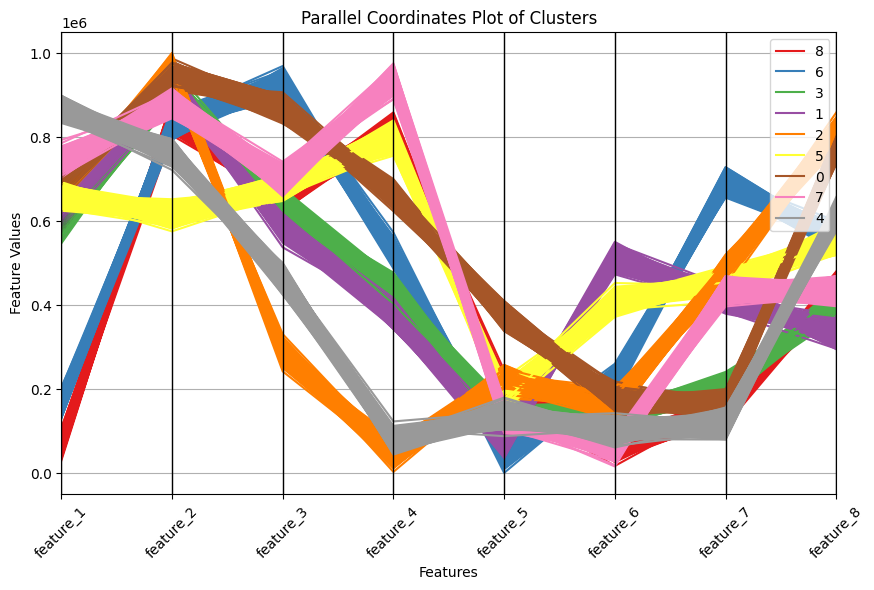

In [71]:
from pandas.plotting import parallel_coordinates

# Add the cluster label to the DataFrame
df_parallel = df3[features].copy()
df_parallel['Label'] = df3['Label_KMeans'].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, class_column='Label', colormap=plt.get_cmap("Set1"))

# Add labels and title
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()

### Explore dataset 4

In [72]:
display_n_samples_df(df4)

Number of samples in dataset 1: 1024


In [73]:
df4.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        126        151        205         39        163         36   
1        126        151        205         39        162         36   
2        126        151        205         39        163         36   
3        126        151        204         39        162         37   
4        127        151        206         39        162         36   

   feature_7  feature_8  feature_9  feature_10  ...  feature_1015  \
0        136        187        113         196  ...            86   
1        136        187        113         195  ...            86   
2        137        188        113         195  ...            86   
3        136        187        113         194  ...            87   
4        135        188        112         195  ...            86   

   feature_1016  feature_1017  feature_1018  feature_1019  feature_1020  \
0           112           165           173           204            91   
1           112           165           174           204            91   
2           111           165           173           204            91   
3           112           165           172           203            91   
4           112           165           173           204            91   

   feature_1021  feature_1022  feature_1023  feature_1024  
0            59           149           139           128  
1            59           148           139           127  
2            59           148           139           127  
3            59           148           140           127  
4            59           148           139           128  

[5 rows x 1024 columns]

In [74]:
for column in df4.columns:
    df4[column] = df4[column].astype('int')

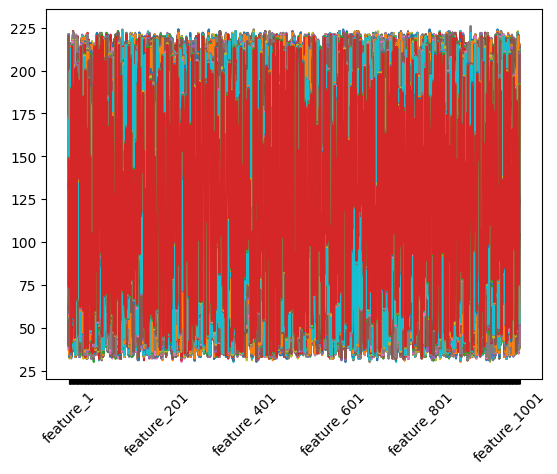

In [75]:
visualize_samples_df(df4)

In [76]:
max_n_clusters = define_max_n_clusters_df(df4)
print('Maximum number of clusters to experiment with: {}'.format(max_n_clusters))

Maximum number of clusters to experiment with: 51


In [77]:
df4_scaled = scale_df(df4)
X = np.array(df4_scaled)

In [78]:
## Apply kmeans and use the silhouette method to define the optimal number of clusters
# Commented out so that I don't have to reexecute it every time
'''
k_values = range(2, max_n_clusters)

silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2  # +2 since we start from 2 clusters
print('Optimal K: {}'.format(optimal_k))
'''

"\nk_values = range(2, max_n_clusters)\n\nsilhouette_scores = []\nfor k in k_values:\n    model = KMeans(n_clusters=k)\n    labels = model.fit_predict(X)\n    score = silhouette_score(X, labels)\n    silhouette_scores.append(score)\n\noptimal_k = np.argmax(silhouette_scores) + 2  # +2 since we start from 2 clusters\nprint('Optimal K: {}'.format(optimal_k))\n"

In [79]:
optimal_k = 16
model = KMeans(n_clusters=optimal_k)
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
silhouette_scores.append(score)

print('Average Silhouette: {:.2f}'.format(score))

Average Silhouette: 0.99


In [80]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto")
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

df4['Label_KMeans'] = y

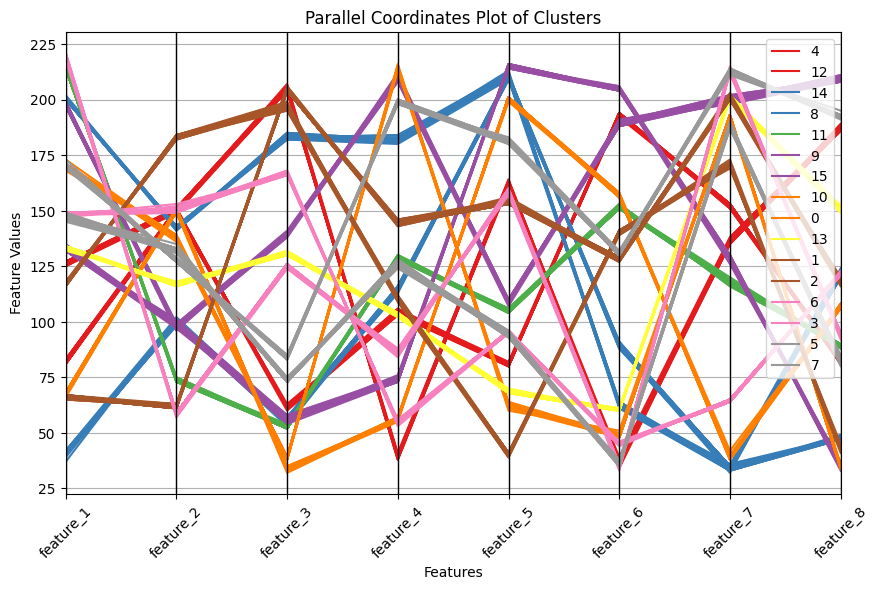

In [81]:
from pandas.plotting import parallel_coordinates

# Add the cluster label to the DataFrame
df_parallel = df4[features].copy()
df_parallel['Label'] = df4['Label_KMeans'].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, class_column='Label', colormap=plt.get_cmap("Set1"))

# Add labels and title
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()

#### Try to apply DBSCAN in this case

In [82]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Step 2: Set up and Fit DBSCAN Model
eps = 0.5  # This value should be tuned
min_samples = 5  # This value should be tuned

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_pred = dbscan.fit_predict(X)

In [83]:
set(y_pred)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [84]:
print('Number of detected clusters: {}'.format(y_pred.max() + 1))

Number of detected clusters: 16


In [85]:
print('Number of outliers: {} ({:.2f}% of {} samples)'.format(sum(y_pred==-1), sum(y_pred==-1)/len(y_pred)*100, len(y_pred)))

Number of outliers: 116 (11.33% of 1024 samples)


In [86]:
# Step 3: Evaluate Clustering with Silhouette Score
# Note: Silhouette Score is only meaningful if there is more than 1 cluster
if len(set(y_pred)) > 1:
    silhouette_avg = silhouette_score(X, y_pred)
    print(f"Average silhouette score: {silhouette_avg}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

Average silhouette score: 0.7677184182555921


In [87]:
df4['Label_DBSCAN'] = y_pred

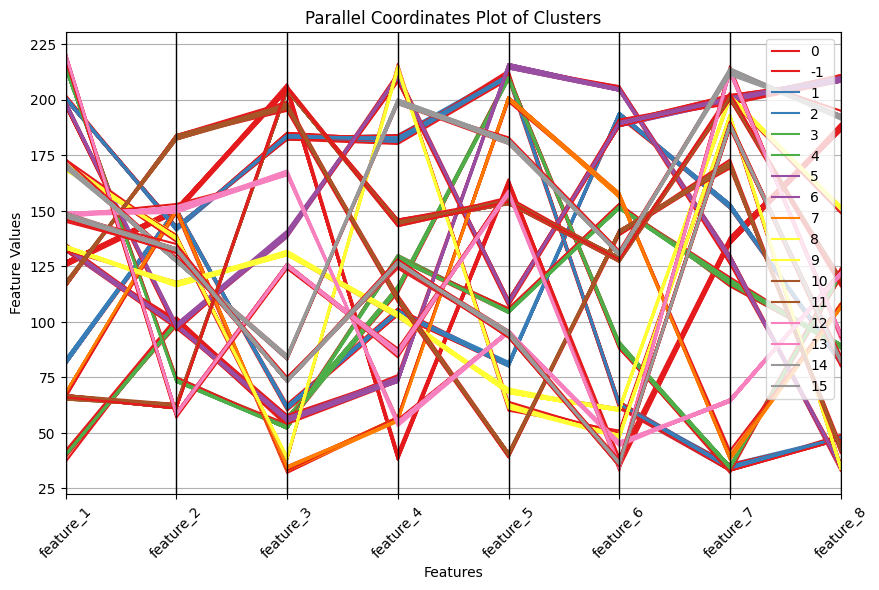

In [88]:
# Add the cluster label to the DataFrame
df_parallel = df4[features].copy()
df_parallel['Label'] = df4['Label_DBSCAN'].astype(str)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, class_column='Label', colormap=plt.get_cmap("Set1"))

# Add labels and title
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()